In [1]:
import tensorflow as tf

# Classificateur d'images

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

## train : 60 000 images, test : 10 000 images, validation : 5000 dernières images de train

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

## Normalisation

In [9]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

# Nom des classes

In [11]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandak', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
class_names[y_train[0]]

'Ankle boot'

In [13]:
y_train[0]

9

La première image du jeu de données montre 'Ankle boot'

# Model

In [16]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\nicolas.sales\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [20]:
hidden1 = model.layers[1]

In [21]:
hidden1.name

'dense_3'

In [22]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01616725, -0.04550347, -0.06654948, ..., -0.00137296,
         0.05834861, -0.00815948],
       [ 0.03707989,  0.0564854 , -0.02918276, ..., -0.05677786,
         0.06446412,  0.05677202],
       [ 0.02243578,  0.06430368,  0.04545601, ..., -0.04074163,
         0.02195716,  0.02929999],
       ...,
       [-0.00386635, -0.01088022, -0.06716807, ...,  0.0391713 ,
         0.00777111, -0.0488523 ],
       [ 0.06550163,  0.05043374, -0.06575067, ..., -0.03265757,
        -0.03085915,  0.06788503],
       [ 0.06604119, -0.04371803,  0.00473876, ...,  0.02114764,
        -0.06146447, -0.02633397]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

## Distribution des données des étiquettes d'entraînement

In [69]:
import numpy as np
np.bincount(y_train)

array([5479, 5503, 5510, 5492, 5473, 5497, 5533, 5550, 5485, 5478],
      dtype=int64)

Les classes sont plutôt équilibrées

# Pour rééquilibrer:

from sklearn.utils.class_weight import compute_class_weight

# Calcul des poids de classes
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)

# Conversion des poids en dicttion fit)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Entraînement avec les poids de classe
model.fit(X_train, y_train, class_weight=class_weight_dict, epochs=10, batch_size=32)


# Compilation du modèle

In [55]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

In [57]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6896 - loss: 0.9855 - val_accuracy: 0.8278 - val_loss: 0.5052
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8250 - loss: 0.5066 - val_accuracy: 0.8424 - val_loss: 0.4535
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8433 - loss: 0.4520 - val_accuracy: 0.8464 - val_loss: 0.4313
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8544 - loss: 0.4222 - val_accuracy: 0.8518 - val_loss: 0.4162
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8610 - loss: 0.4004 - val_accuracy: 0.8560 - val_loss: 0.4035
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8659 - loss: 0.3833 - val_accuracy: 0.8568 - val_loss: 0.3954
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8711 - loss: 0.3691 - val_accuracy: 0.8588 - val_loss: 0.3874
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8757 - 

In [77]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

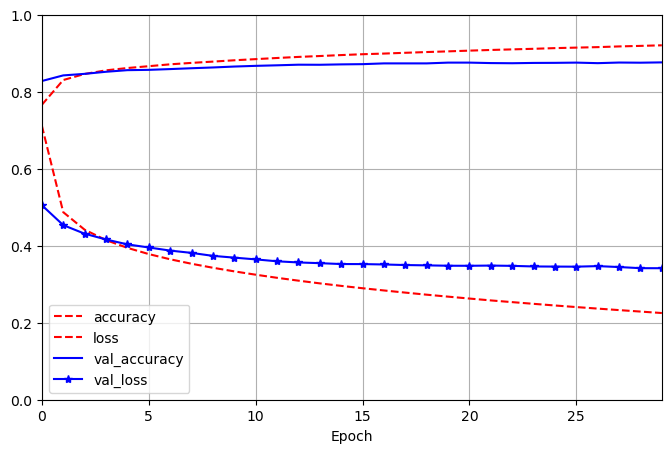

In [83]:
pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch", style=["r--", "r--", "b-", "b-*"])
plt.show()

In [85]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8740 - loss: 0.3625


[0.3608822524547577, 0.8748000264167786]

## Prédictions

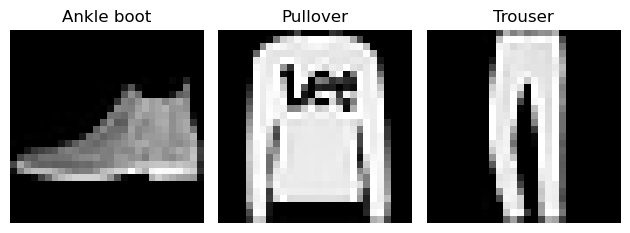

In [131]:
for i in range(3):
    plt.subplot(1, 3, i + 1)  
    plt.imshow(X_test[i], cmap='gray')  
    plt.title(np.array(class_names)[y_test[i]])  
    plt.axis('off')  

plt.tight_layout()  
plt.show()

In [88]:
X_new = X_test[:3]

In [90]:
y_proba = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


In [92]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.01, 0.  , 0.69],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [102]:
y_pred = y_proba.argmax(axis=-1)

In [104]:
y_pred

array([9, 2, 1], dtype=int64)

In [106]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [112]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Le classificateur a fait une prédiction correcte des 3 images

# Perceptron multicouche de régression

In [138]:
from sklearn.datasets import fetch_california_housing

In [146]:
from sklearn.model_selection import train_test_split

In [527]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [407]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(11610, 8)
(3870, 8)
(5160, 8)
(11610,)
(3870,)
(5160,)


## Réseau de neurones avec API Sequentielle

In [362]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])  

model = tf.keras.Sequential([
    norm_layer,  # Normalisation de l'entrée
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1) 
])


tf.keras.layers.Normalization à la place de Flatten(). Même rôle que StandardScaler(). Fonction appelée avec adpat() avant la méthode fit()

In [365]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer = optimizer, metrics=['RootMeanSquaredError'])

In [367]:
norm_layer.adapt(X_train)

In [369]:
history= model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - RootMeanSquaredError: 1.2100 - loss: 1.5605 - val_RootMeanSquaredError: 0.7442 - val_loss: 0.5538
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6499 - loss: 0.4227 - val_RootMeanSquaredError: 0.9078 - val_loss: 0.8241
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - RootMeanSquaredError: 0.6098 - loss: 0.3721 - val_RootMeanSquaredError: 1.0359 - val_loss: 1.0731
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5972 - loss: 0.3568 - val_RootMeanSquaredError: 1.0266 - val_loss: 1.0539
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - RootMeanSquaredError: 0.5843 - loss: 0.3416 - val_RootMeanSquaredError: 1.0117 - val_loss: 1.0236
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - RootMeanSquaredError: 0.5756 - loss: 0.3315 - val_RootMeanSquaredError: 1.1793 - val_loss: 1.3907
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - RootMeanSquaredError: 0.56

In [371]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5324 - loss: 0.2837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [346]:
y_pred

array([[0.4836685 ],
       [0.93993634],
       [4.6687546 ]], dtype=float32)

# Réseau de neurone avec API fonctionnelle (non sequentielle)

Construction de modèles afin d'avoir plusieurs entrées ou plusieurs sorties. Un sous-ensemble peut passer par le chemin profond (toutes les couches) ou par un chemin large allant directement vers la sortie

## Modèle avec 2 entrées, 2 chemins (profond et large) et 1 sortie

In [390]:
input_wide = tf.keras.layers.Input(shape=[5])  # 5 caractéristiques
input_deep = tf.keras.layers.Input(shape=[6])  # 6 caractéristiques
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [391]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer = optimizer, metrics=['RootMeanSquaredError'])

In [394]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [396]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [398]:
history = model.fit((X_train_wide,X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 1.5206 - loss: 2.4148 - val_RootMeanSquaredError: 1.0927 - val_loss: 1.1940
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - RootMeanSquaredError: 0.7748 - loss: 0.6007 - val_RootMeanSquaredError: 0.6902 - val_loss: 0.4764
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - RootMeanSquaredError: 0.7113 - loss: 0.5063 - val_RootMeanSquaredError: 0.6627 - val_loss: 0.4391
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - RootMeanSquaredError: 0.6723 - loss: 0.4522 - val_RootMeanSquaredError: 0.6305 - val_loss: 0.3976
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - RootMeanSquaredError: 0.6465 - loss: 0.4181 - val_RootMeanSquaredError: 0.7532 - val_loss: 0.5674
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - RootMeanSquaredError: 0.6301 - loss: 0.3973 - val_RootMeanSquaredError: 0.7240 - val_loss: 0.5241
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.

In [400]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - RootMeanSquaredError: 0.5752 - loss: 0.3310


[0.3256673514842987, 0.5706726908683777]

In [402]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.4109966],
       [1.5246751],
       [3.3985288]], dtype=float32)

## Modèle avec 2 entrées, 2 chemins (profond et large) et 2 sortie

In [437]:
input_wide = tf.keras.layers.Input(shape=[5])  # 5 caractéristiques
input_deep = tf.keras.layers.Input(shape=[6])  # 6 caractéristiques
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

### Poids supérieur à la sortie principale car plus d'importance

In [440]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse','mse'), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=['RootMeanSquaredError', 'RootMeanSquaredError'])

In [442]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [444]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_108_RootMeanSquaredError: 1.4400 - dense_108_loss: 1.9555 - dense_109_RootMeanSquaredError: 2.0503 - dense_109_loss: 0.4329 - loss: 2.3884 - val_dense_108_RootMeanSquaredError: 1.2108 - val_dense_108_loss: 1.3189 - val_dense_109_RootMeanSquaredError: 2.8368 - val_dense_109_loss: 0.8044 - val_loss: 2.1242
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_108_RootMeanSquaredError: 0.7187 - dense_108_loss: 0.4655 - dense_109_RootMeanSquaredError: 0.9786 - dense_109_loss: 0.0960 - loss: 0.5614 - val_dense_108_RootMeanSquaredError: 0.6441 - val_dense_108_loss: 0.3733 - val_dense_109_RootMeanSquaredError: 0.9176 - val_dense_109_loss: 0.0842 - val_loss: 0.4576
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - dense_108_RootMeanSquaredError: 0.6691 - dense_108_loss: 0.4032 - dense_109_RootMeanSquaredError: 0.8077 - dense_109_loss: 0.0653 - loss: 0.4685 - val_dense_108_RootMeanSquaredError: 0.6165 - val_dense_108_loss: 

In [448]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test,y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - dense_108_RootMeanSquaredError: 0.5753 - dense_108_loss: 0.2980 - dense_109_RootMeanSquaredError: 0.6341 - dense_109_loss: 0.0402 - loss: 0.3382


In [450]:
print(weighted_sum_of_losses)
print(main_loss)
print(aux_loss)
print(main_rmse)
print(aux_rmse)

0.3377401828765869
0.29734939336776733
0.0401567667722702
0.5750682950019836
0.6333006024360657


In [452]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [454]:
print(y_pred_main)
print(y_pred_aux)

[[0.2497235]
 [1.0646936]
 [3.5854254]]
[[0.35192257]
 [1.0195955 ]
 [3.3209963 ]]


In [458]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [460]:
y_pred

{'dense_108': array([[0.2497235],
        [1.0646936],
        [3.5854254]], dtype=float32),
 'dense_109': array([[0.35192257],
        [1.0195955 ],
        [3.3209963 ]], dtype=float32)}

# Modèle avec API de sous-classement

In [529]:
@tf.keras.utils.register_keras_serializable()

class WideAndDeepModel (tf.keras.Model) : 

    # Constructeur
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs 
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [531]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse','mse'), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=['RootMeanSquaredError', 'RootMeanSquaredError'])

In [533]:
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

In [535]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 1.8396 - RootMeanSquaredError_1: 1.9130 - loss: 3.5488 - mse_loss: 0.3720 - val_RootMeanSquaredError: 1.1773 - val_RootMeanSquaredError_1: 2.8882 - val_loss: 2.0816 - val_mse_loss: 0.8338
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7970 - RootMeanSquaredError_1: 0.8794 - loss: 0.6497 - mse_loss: 0.0774 - val_RootMeanSquaredError: 0.9903 - val_RootMeanSquaredError_1: 1.0241 - val_loss: 0.9875 - val_mse_loss: 0.1048
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7096 - RootMeanSquaredError_1: 0.7809 - loss: 0.5143 - mse_loss: 0.0610 - val_RootMeanSquaredError: 1.5798 - val_RootMeanSquaredError_1: 0.7769 - val_loss: 2.3067 - val_mse_loss: 0.0603
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - RootMeanSquaredError: 0.6773 - RootMeanSquaredError_1: 0.7595 - loss: 0.4707 - mse_loss: 0.0577 - val_RootMeanSquaredError: 1.8530 - val_RootMeanSquared

In [537]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [539]:
print(y_pred_main)
print(y_pred_aux)

[[0.32673165]
 [1.4325111 ]
 [3.6328325 ]]
[[0.65761685]
 [1.3355799 ]
 [3.4504893 ]]


# Sauvergarde du modèle

In [542]:
model.save('my_keras_model.keras')

In [544]:
model.save('my_keras_model.h5')

# Chargement du modèle

In [547]:
model = tf.keras.models.load_model('my_keras_model.keras')

In [549]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [551]:
print(y_pred_main)
print(y_pred_aux)

[[0.32673165]
 [1.4325111 ]
 [3.6328325 ]]
[[0.65761685]
 [1.3355799 ]
 [3.4504893 ]]
